In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [2]:
v = 'v10'
final_clusters = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/final_clusters_{v}.pq')[0]
from core.cluster_validation import get_color
final_colors = pd.DataFrame(get_color(final_clusters.values), final_clusters.values).drop_duplicates()
final_colors.loc[-1] = [255,255,255]

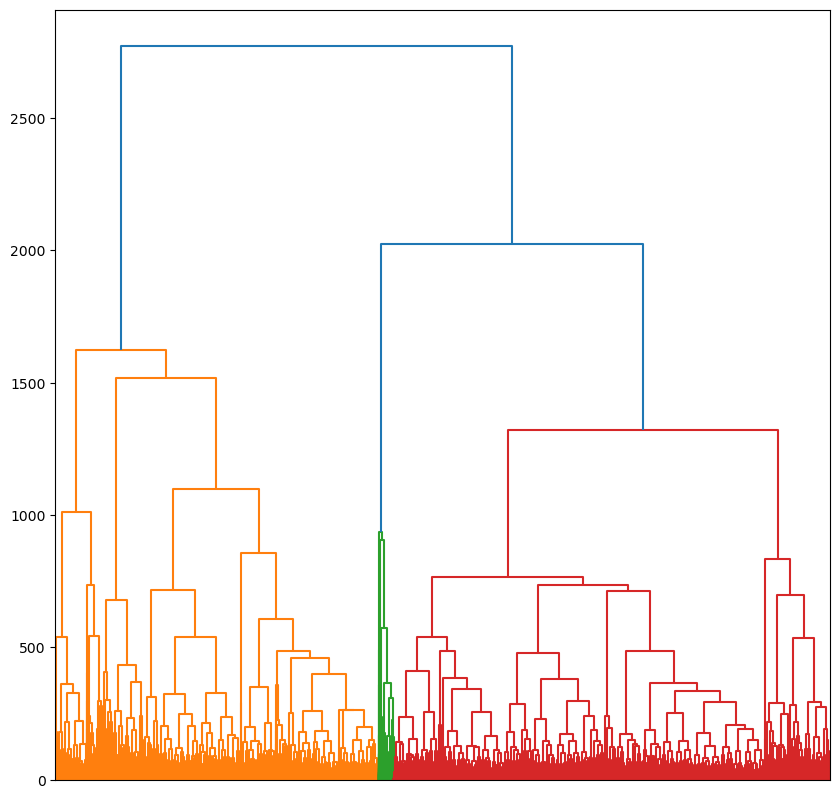

In [3]:
linkage_matrix = np.load(f'/data/uscuni-ulce/processed_data/clusters/complete_linkage_10_{v}.npy')
## final dendrogram
fig,ax = plt.subplots(figsize=(10,10))
_ = dendrogram(linkage_matrix,ax=ax, no_labels=True)

In [4]:
region_hulls = gpd.read_parquet('/data/uscuni-ulce/regions/cadastre_regions_hull.parquet')


In [5]:
cluster_mapping = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cluster_mapping_{v}.pq')

In [6]:


# region_id = 69333  # prague

# region_id = 99886 # bratislava

# region_id = 151676 # vilnius


# region_id = 8707 # frankfurt / mainz
# region_id = 5883 # freiburtg
# region_id = 38679 # munich
# region_id = 55763 # berlin
# region_id = 34266 # nuremberg

# region_id = 86873 # vienna


# region_id = 107131 # krakow

# region_id= 66593 # usti

# region_id = 62954 # lindz
# region_id = 91011 # above brno

# region_id = 51289 # salzburg

region_id = 93167

In [7]:
etcs = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_{region_id}_{v}.pq')

In [8]:
etcs = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_{69333}_{v}.pq')
etcs2 = gpd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/clusters_{74378}_{v}.pq')

etcs = pd.concat((etcs, etcs2), ignore_index=True)

In [9]:
etcs.final_without_noise = etcs.final_without_noise.map(cluster_mapping[4].to_dict())

In [10]:
# etcs = pd.merge(etcs, res, left_on='morph', right_index=True)

In [11]:
import lonboard
layer = lonboard.SolidPolygonLayer.from_geopandas(etcs, opacity=.7)

from sidecar import Sidecar
sc = Sidecar(title=f'Final Clusters')
m = lonboard.Map(layer, basemap_style=lonboard.basemap.CartoBasemap.DarkMatter)
with sc:
    display(m)

/home/krasen/urban_taxonomy/.pixi/envs/default/lib/python3.12/site-packages/lonboard/_geoarrow/ops/reproject.py:97: UserWarning: Input being reprojected to EPSG:4326 CRS
  warnings.warn("Input being reprojected to EPSG:4326 CRS")


In [12]:
from core.cluster_validation import get_color
layer.get_fill_color = final_colors.loc[etcs.final_without_noise].values.astype('uint8')

In [13]:
etcs.final_without_noise.nunique()

8

In [43]:
# layer.get_fill_color = get_color(etcs.morph.factorize()[0])

In [18]:
colors = final_colors.loc[etcs.final_without_noise].values.astype('uint8')
colors[etcs.limSDi > .3] = [0, 0, 0]
layer.get_fill_color = colors

AttributeError: 'GeoDataFrame' object has no attribute 'limSDi'

In [42]:
cdata = pd.read_parquet(f'/data/uscuni-ulce/processed_data/clusters/cdata_{v}.pq')

In [43]:
cdata.style.background_gradient(axis=0, cmap="BuGn")

,sdbAre,sdbPer,sdbCoA,ssbCCo,ssbSqu,ssbERI,ssbElo,libNCo,ldbPWL,ltcBuA,mtbAli,mtbNDi,ltbIBD,stbSAl,sdsLen,sssLin,ldsMSL,ldsRea,ldsAre,sisBpM,sdsSPW,sdsSPO,sdsSWD,lcdMes,linP3W,linP4W,linPDE,lcnClo,lddNDe,linWID,ldsCDL,xcnSCl,mtdMDi,sddAre,midRea,midAre,sdcLAL,sdcAre,sscCCo,sscERI,mtcWNe,mdcAre,ltcWRB,sicCAR,sdsAre,mibCou,mibAre,mibLen,mibElo,mibERI,mibCCo,mibLAL,mibFR,mibSCo,micBAD,midBAD,limLPS,limAre
1,464.090121,107.631740,0.000000,0.376814,0.410317,0.965410,0.417568,0.000000,134.728453,1.000000,2.810109,26.562292,30.399767,4.933632,217.487068,0.994879,164.983727,152.500000,410165.191679,0.036440,33.945482,0.676798,3.376663,0.110443,0.710526,0.142857,0.129032,0.000003,0.005079,0.009606,207.787359,0.000000,175.322724,29620.444234,23.250000,72846.105182,94.304162,3180.498676,0.471951,0.973790,0.028726,28414.764762,0.000032,0.152985,28175.809652,1.000000,628.722610,134.003643,0.412122,0.918363,0.331353,51.553642,4.509376,4.509376,392.507555,310.989166,1.000000,25615.345706
2,269.920429,75.943021,0.000000,0.457911,0.361646,0.994037,0.515400,0.000000,125.826969,0.809091,2.480241,20.254578,24.229364,4.342733,222.621421,0.995651,167.305430,249.000000,441435.509530,0.059716,31.171810,0.629032,3.699860,0.115044,0.717949,0.142857,0.125000,0.000004,0.004976,0.009500,205.481591,0.000000,182.135743,30812.281468,41.000000,78947.412842,71.292591,1793.976430,0.464620,0.971702,0.037431,18301.447318,0.000038,0.171787,28570.513103,2.000000,571.033799,125.309928,0.488760,0.911511,0.367760,46.838247,4.387663,4.387663,350.958627,305.791140,1.000000,27278.207019
3,144.340445,53.168754,0.000000,0.512358,0.275423,0.999479,0.593762,0.000000,78.429181,0.857143,3.080675,23.013380,28.855268,6.136978,322.479768,0.989303,244.691322,268.000000,680824.924037,0.058647,32.320915,0.780034,4.148470,0.086957,0.727273,0.105263,0.157895,0.000003,0.003648,0.006497,341.836851,0.000000,257.535427,56911.131522,46.000000,126569.543580,75.364431,1849.948170,0.447515,0.968149,0.034756,20760.668854,0.000027,0.106593,55334.850768,1.000000,266.850122,77.743692,0.581657,0.957114,0.464770,28.051915,3.366192,3.366192,275.676810,312.755349,1.000000,22266.226896
4,159.217171,57.046032,0.000000,0.503268,0.231884,0.999524,0.565281,0.000000,158.449901,0.666667,1.780880,13.902142,19.927602,5.255232,296.683190,0.991396,214.797624,381.000000,604780.094282,0.096848,30.389921,0.630435,4.169729,0.090909,0.717391,0.125000,0.150943,0.000003,0.004091,0.007397,303.119106,0.000000,234.646620,46480.436821,71.000000,115127.860852,54.266286,965.661624,0.447560,0.965984,0.047444,12407.161548,0.000035,0.207571,43187.826303,3.000000,850.321513,158.897028,0.561849,0.844413,0.399940,54.638559,5.116385,5.116385,382.704950,405.809159,1.000000,30949.816734
5,129.728011,50.378964,0.000000,0.515186,0.253421,0.998828,0.595699,0.000000,99.340927,0.738636,2.381093,14.714485,18.954705,4.990658,206.791757,0.993507,160.598836,302.000000,373851.730836,0.093814,28.511975,0.583333,4.144143,0.098765,0.725000,0.117647,0.142857,0.000004,0.005256,0.009537,238.427076,0.000000,169.122510,25515.932956,52.000000,64159.745128,50.209465,857.575030,0.450076,0.968456,0.052074,9773.735950,0.000050,0.177546,24274.530771,2.000000,376.879106,98.928255,0.537212,0.898628,0.407558,35.654633,3.697867,3.697867,196.385939,200.000745,1.000000,17054.173835
6,141.771955,53.539188,0.000000,0.512050,0.210693,0.999463,0.595558,0.000000,124.148866,0.714286,2.220049,15.730672,21.831677,5.436552,274.138446,0.991512,209.479834,308.000000,543186.112200,0.078846,30.543796,0.658537,4.148360,0.086957,0.722222,0.115385,0.152174,0.000003,0.004181,0.007576,303.057092,0.000000,217.012729,42018.815169,54.000000,101233.776311,57.594256,1092.209876,0.445188,0.964962,0.044253,15205.124137,0.000031,0.176355,40562.500537,2.000000,581.614958,123.985959,0.598543,0.889118,0.442911,44.106939,4.385518,4.385518,471.366877,482.900155,0.000000,52075.389894
7,73.294631,36.732804,0.000000,0.546250,0.234160,0.999568,0.674251,0.000000,62.086549,0.777778,2.635386,13.3044

In [23]:
cdata.index[cdata['mibAre'] < 150]

Index([6, 12, 13, 15, 17, 24, 28, 31], dtype='int64', name='0')

In [63]:
morphotopes_dir = '/data/uscuni-ulce/processed_data/morphotopes/'

def read_morphotopes_chars():
    
    data = []
    for region_id, _ in region_hulls.iterrows():
        extra_chars = pd.read_parquet(f'{morphotopes_dir}morph_chars_{region_id}.pq')
        data.append(extra_chars)
    
    data = pd.concat(data)
    return data 

morph_chars_data = read_morphotopes_chars()

In [64]:
etcs.morph

0            69333_0_-1
1             69333_1_0
2             69333_1_0
3             69333_1_0
4             69333_1_0
              ...      
546319      74378_434_0
546320    74378_1919_-1
546321      74378_434_0
546322     74378_434_-1
546323      74378_434_0
Name: morph, Length: 546324, dtype: object

In [65]:
# etcs[etcs.final == 27].explore()

In [66]:
res = morph_chars_data[['limSDi']].values
res = pd.DataFrame(res, index=morph_chars_data.index, columns = ['limSDi'])

In [67]:
etcs = pd.merge(etcs, res, left_on='morph', right_index=True)